In [17]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

import pandas as pd
from matplotlib.cm import get_cmap

from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

import os

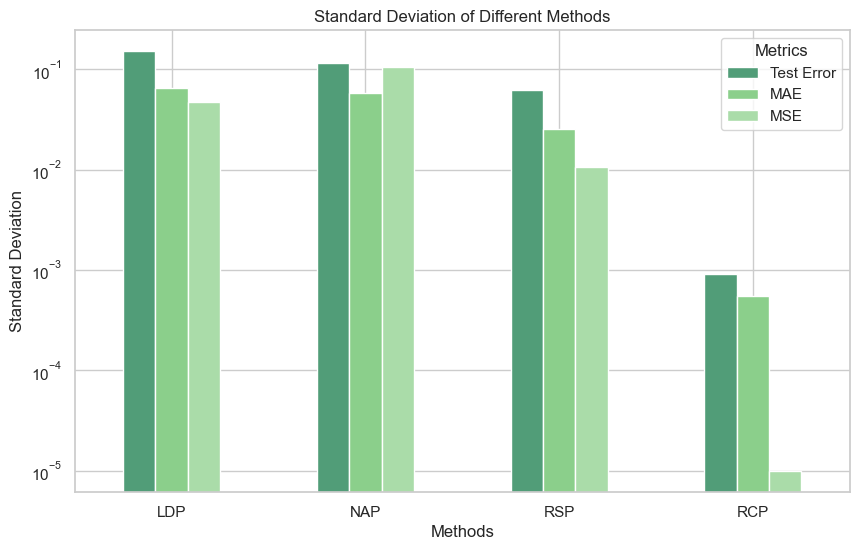

In [18]:
# 示例数据
methods = ['LDP', 'NAP', 'RSP', 'RCP']
seeds = range(10)
testerror = {
    'LDP': [0.3483230307133258, 0.06655278697089981, 0.06823545906767987, 0.06370955409864532, 0.062005208792711014, 0.3229283988187904, 0.37678176609367614, 0.04274695510932498, 0.005700814827643679, 0.3141703466091914],
    'NAP': [0.4072500508764285, 0.4369916178472029, 0.4134901301061168, 0.3702678872891184, 0.3915491848736719, 0.38915176907921883, 0.3576345865449998, 0.3757274419646285, 0.7514636257883783, 0.38279348872132096],
    'RSP': [0.005936840361050542, 0.01009709853357338, 0.005594410468342117, 0.006054801154312517, 0.004473344373854045, 0.007172801362990527, 0.006020731984708229, 0.013771429930184854, 0.20595280704632135, 0.010057650596536061],
    'RCP': [0.006436023886097595, 0.005798321383451822, 0.0055770145038127016, 0.006310413966055017, 0.007314982233189383, 0.005358156500519818, 0.006105292502433805, 0.006474646112034115, 0.008336536806698158, 0.00721378041216497],
}
mae = {
    'LDP': [0.14482204584243175, 0.025236943440228064, 0.023875915881075224, 0.02693932320995252, 0.020194138705335037, 0.1444462413262765, 0.1618543355846889, 0.01562858658216366, 0.0033156893519249954, 0.12738558184130988],
    'NAP': [0.1644818051157677, 0.18847612658691734, 0.17780203801878908, 0.1433848759551153, 0.1450755308248206, 0.1726662824823063, 0.1576743509846429, 0.1608696793297323, 0.34124933217057285, 0.1511806195198226],
    'RSP': [0.00343730163922669, 0.006153658113992598, 0.003410802013045048, 0.0034823890766193777, 0.0024858377197863844, 0.004341827339575102, 0.003452396635448465, 0.007781103740775292, 0.08548265673067312, 0.005485981252256544],
    'RCP': [0.0034420936350139084, 0.003185621533798595, 0.0031846112810437754, 0.003331467202000288, 0.0037458169981414756, 0.0031245456950890166, 0.003611788642594076, 0.003560692426049923, 0.00502097202829107, 0.0038196814712493413],
}
mse = {
    'LDP': [0.09705432957736754, 0.003543096871902167, 0.003724523925688905, 0.0032468308516055305, 0.0030754373299206527, 0.08341862201447513, 0.11356128234609232, 0.0014617089403809935, 2.599706992089799e-05, 0.07895523225411608],
    'NAP': [0.13267003005555436, 0.15275546139447982, 0.13676684486426535, 0.10966868326690424, 0.12263746970453065, 0.12114027388683257, 0.10231270286754783, 0.11292662911214085, 0.451717026135263, 0.11721403509028032],
    'RSP': [2.8194297321216202e-05, 8.155370986848867e-05, 2.503566829577554e-05, 2.9325829357864324e-05, 1.6007193653318896e-05, 4.11555245277044e-05, 2.8996736546743608e-05, 0.00015170804315523106, 0.033930164422811174, 8.091771702879989e-05],
    'RCP': [3.3134912457319505e-05, 2.6893981369705472e-05, 2.4880212248937795e-05, 3.18541655818488e-05, 4.280328337169012e-05, 2.2965786421520835e-05, 2.9816968355408335e-05, 3.3533787270400454e-05, 5.559322608919364e-05, 4.162712043674625e-05],
}


# 创建 DataFrame
df_testerror = pd.DataFrame(testerror, index=seeds)
df_mae = pd.DataFrame(mae, index=seeds)
df_mse = pd.DataFrame(mse, index=seeds)

# 计算标准差
std_testerror = df_testerror.std()
std_mae = df_mae.std()
std_mse = df_mse.std()

# 合并标准差数据
std_df = pd.DataFrame({
    'Test Error': std_testerror,
    'MAE': std_mae,
    'MSE': std_mse
})

# 自定义颜色
colors = ['#519D78', '#8BCF8B', '#AADCA9']  

# 绘制标准差的柱状图
ax = std_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Standard Deviation of Different Methods')
plt.xlabel('Methods')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

plt.yscale('log')  # 使用对数坐标



plt.show()

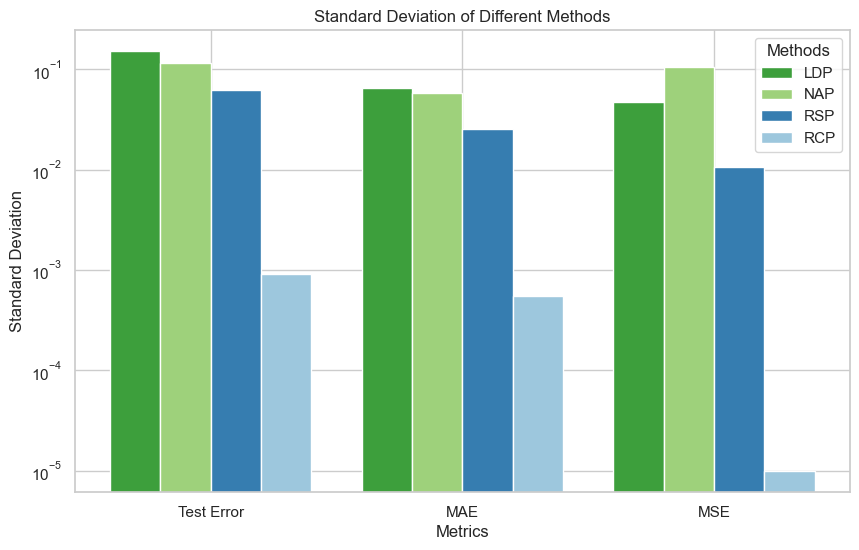

In [19]:
# 示例数据
methods = ['LDP', 'NAP', 'RSP', 'RCP']
seeds = range(10)
testerror = {
    'LDP': [0.3483230307133258, 0.06655278697089981, 0.06823545906767987, 0.06370955409864532, 0.062005208792711014, 0.3229283988187904, 0.37678176609367614, 0.04274695510932498, 0.005700814827643679, 0.3141703466091914],
    'NAP': [0.4072500508764285, 0.4369916178472029, 0.4134901301061168, 0.3702678872891184, 0.3915491848736719, 0.38915176907921883, 0.3576345865449998, 0.3757274419646285, 0.7514636257883783, 0.38279348872132096],
    'RSP': [0.005936840361050542, 0.01009709853357338, 0.005594410468342117, 0.006054801154312517, 0.004473344373854045, 0.007172801362990527, 0.006020731984708229, 0.013771429930184854, 0.20595280704632135, 0.010057650596536061],
    'RCP': [0.006436023886097595, 0.005798321383451822, 0.0055770145038127016, 0.006310413966055017, 0.007314982233189383, 0.005358156500519818, 0.006105292502433805, 0.006474646112034115, 0.008336536806698158, 0.00721378041216497],
}
mae = {
    'LDP': [0.14482204584243175, 0.025236943440228064, 0.023875915881075224, 0.02693932320995252, 0.020194138705335037, 0.1444462413262765, 0.1618543355846889, 0.01562858658216366, 0.0033156893519249954, 0.12738558184130988],
    'NAP': [0.1644818051157677, 0.18847612658691734, 0.17780203801878908, 0.1433848759551153, 0.1450755308248206, 0.1726662824823063, 0.1576743509846429, 0.1608696793297323, 0.34124933217057285, 0.1511806195198226],
    'RSP': [0.00343730163922669, 0.006153658113992598, 0.003410802013045048, 0.0034823890766193777, 0.0024858377197863844, 0.004341827339575102, 0.003452396635448465, 0.007781103740775292, 0.08548265673067312, 0.005485981252256544],
    'RCP': [0.0034420936350139084, 0.003185621533798595, 0.0031846112810437754, 0.003331467202000288, 0.0037458169981414756, 0.0031245456950890166, 0.003611788642594076, 0.003560692426049923, 0.00502097202829107, 0.0038196814712493413],
}
mse = {
    'LDP': [0.09705432957736754, 0.003543096871902167, 0.003724523925688905, 0.0032468308516055305, 0.0030754373299206527, 0.08341862201447513, 0.11356128234609232, 0.0014617089403809935, 2.599706992089799e-05, 0.07895523225411608],
    'NAP': [0.13267003005555436, 0.15275546139447982, 0.13676684486426535, 0.10966868326690424, 0.12263746970453065, 0.12114027388683257, 0.10231270286754783, 0.11292662911214085, 0.451717026135263, 0.11721403509028032],
    'RSP': [2.8194297321216202e-05, 8.155370986848867e-05, 2.503566829577554e-05, 2.9325829357864324e-05, 1.6007193653318896e-05, 4.11555245277044e-05, 2.8996736546743608e-05, 0.00015170804315523106, 0.033930164422811174, 8.091771702879989e-05],
    'RCP': [3.3134912457319505e-05, 2.6893981369705472e-05, 2.4880212248937795e-05, 3.18541655818488e-05, 4.280328337169012e-05, 2.2965786421520835e-05, 2.9816968355408335e-05, 3.3533787270400454e-05, 5.559322608919364e-05, 4.162712043674625e-05],
}


# 创建 DataFrame
df_testerror = pd.DataFrame(testerror, index=seeds)
df_mae = pd.DataFrame(mae, index=seeds)
df_mse = pd.DataFrame(mse, index=seeds)

# 计算标准差
std_testerror = df_testerror.std()
std_mae = df_mae.std()
std_mse = df_mse.std()

# 合并标准差数据
std_df = pd.DataFrame({
    'Test Error': std_testerror,
    'MAE': std_mae,
    'MSE': std_mse
})

# 自定义颜色
# colors = ['#288D49', '#5AB66A', '#A5D59E', '#DAECD1']  #绿色
# colors = ['#0D496E', '#0C5B8B', '#10779F', '#3892AA']  #蓝色
colors = ['#3D9F3C', '#9ED17B', '#367DB0', '#9DC7DD']  #蓝绿

# 绘制标准差的柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 设置柱子的宽度和位置
bar_width = 0.2
index = np.arange(len(std_df.columns))

# 绘制每种方法的柱状图
for i, method in enumerate(std_df.index):
    ax.bar(index + i * bar_width - bar_width * 1.5, std_df.loc[method], bar_width, label=method, color=colors[i])

# 设置图的标签、标题和刻度
ax.set_xlabel('Metrics')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of Different Methods')
ax.set_xticks(index)
ax.set_xticklabels(std_df.columns)
ax.legend(title='Methods')

# # 在柱状图上添加数值标签
# for i, method in enumerate(std_df.index):
#     for j, value in enumerate(std_df.loc[method]):
#         ax.annotate(f'{value:.4f}', (index[j] + i * bar_width - bar_width * 1.5, value),
#                     ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.yscale('log')  # 使用对数坐标

# 保存图片为PDF文件
save_dir = '../figure'
save_path = os.path.join(save_dir, 'Schrodinger_Standard_Deviation.pdf')
plt.savefig(save_path, format='pdf')

plt.show()

In [20]:
# 示例数据
methods = ['LDP', 'NAP', 'RSP', 'RCP']
seeds = range(10)
loss_values = {
    'LDP': [0.3483230307133258, 0.06655278697089981, 0.06823545906767987, 0.06370955409864532, 0.062005208792711014, 0.3229283988187904, 0.37678176609367614, 0.04274695510932498, 0.005700814827643679, 0.3141703466091914],
    'NAP': [0.4072500508764285, 0.4369916178472029, 0.4134901301061168, 0.3702678872891184, 0.3915491848736719, 0.38915176907921883, 0.3576345865449998, 0.3757274419646285, 0.7514636257883783, 0.38279348872132096],
    'RSP': [0.005936840361050542, 0.01009709853357338, 0.005594410468342117, 0.006054801154312517, 0.004473344373854045, 0.007172801362990527, 0.006020731984708229, 0.013771429930184854, 0.20595280704632135, 0.010057650596536061],
    'RCP': [0.006436023886097595, 0.005798321383451822, 0.0055770145038127016, 0.006310413966055017, 0.007314982233189383, 0.005358156500519818, 0.006105292502433805, 0.006474646112034115, 0.008336536806698158, 0.00721378041216497],
}

# 创建一个 DataFrame 对象
df = pd.DataFrame(loss_values, index=seeds)


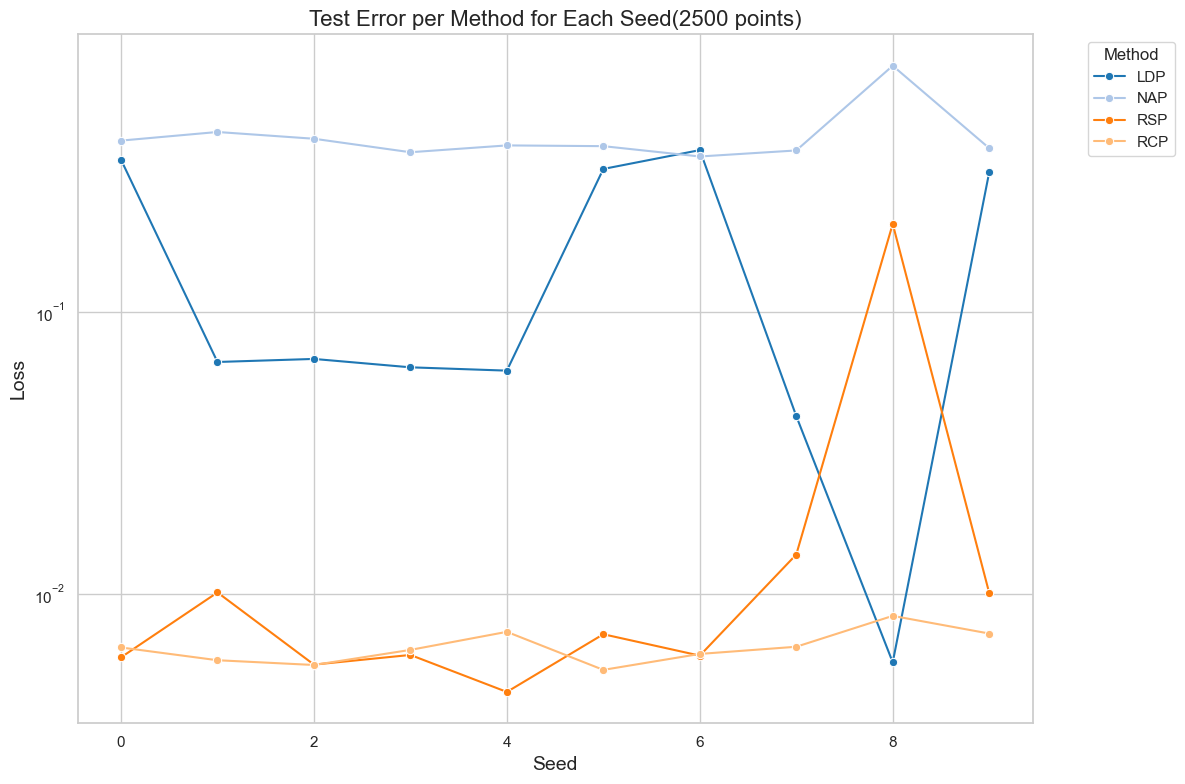

In [21]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

df = pd.DataFrame(data)

# 确保方法按指定顺序排序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

plt.yscale('log')  # 使用对数坐标

# 3. 设置图形标题和标签
plt.title('Test Error per Method for Each Seed(2500 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_100016\261897643.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)


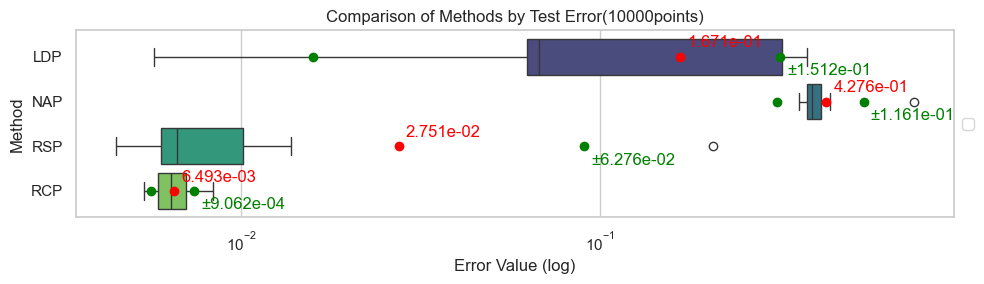

In [22]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


df = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(10, 3))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5)
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.3e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.3e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(10000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='center left', bbox_to_anchor=(1, 0.5))  # 图例放在右侧中部


# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

# 保存为 PNG 文件
fig.savefig('Error.png', dpi=300, bbox_inches='tight')  # 保存高分辨率图像

C:\Users\lcy\AppData\Local\Temp\ipykernel_100016\155383848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


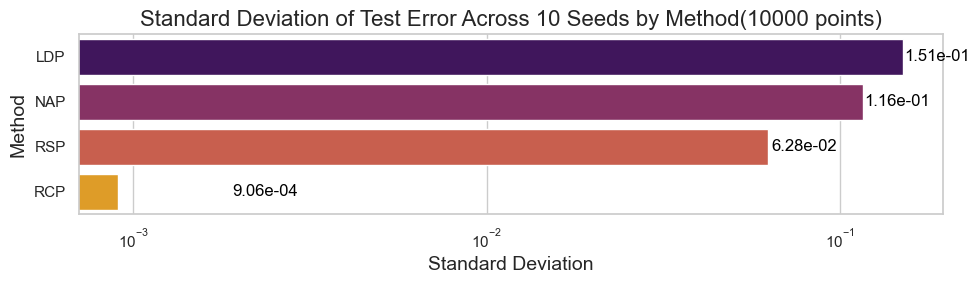

In [23]:
# 计算每种方法在10个seed下的标准差
std_df = df.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(10, 3))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')  # 使用对数刻度

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(10000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()


# 保存为 PNG 文件
plt.savefig('Errorstd.png', dpi=300, bbox_inches='tight')  # 保存当前绘图
# 显示图像
plt.show()




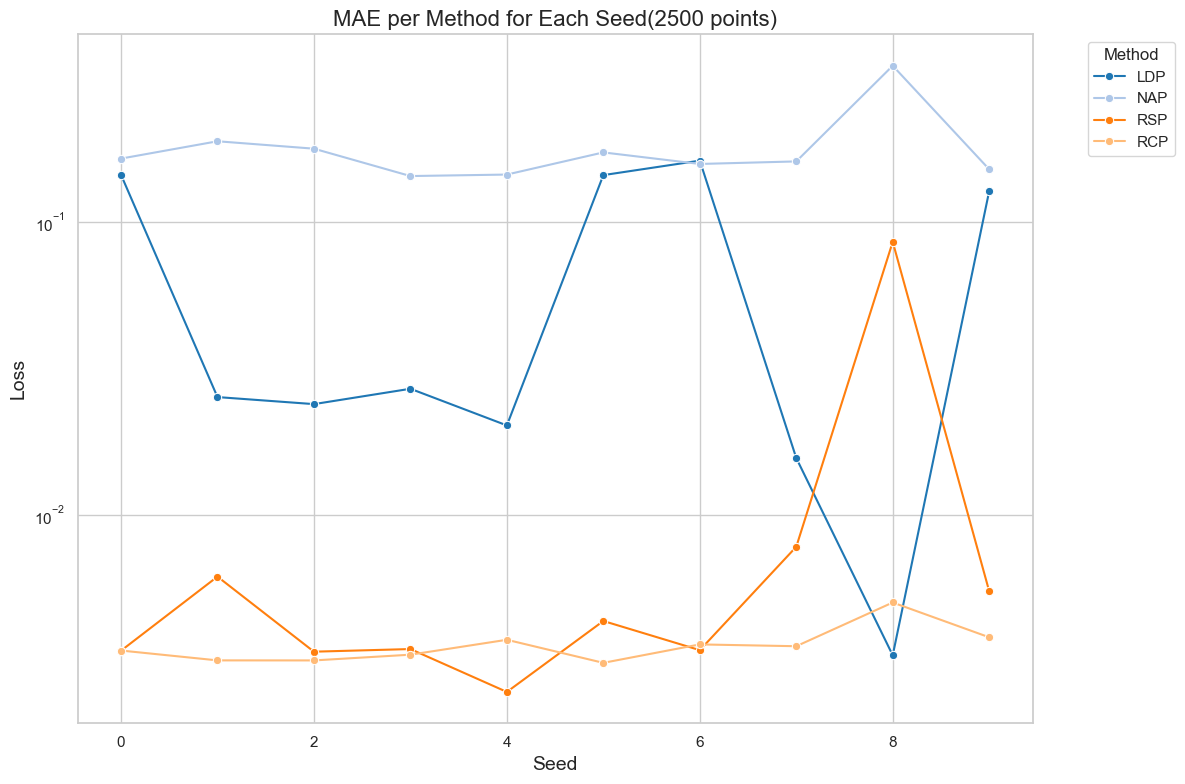

In [24]:
# 示例数据
methods = ['LDP', 'NAP', 'RSP', 'RCP']
seeds = range(10)
loss_values = {
    'LDP': [0.14482204584243175, 0.025236943440228064, 0.023875915881075224, 0.02693932320995252, 0.020194138705335037, 0.1444462413262765, 0.1618543355846889, 0.01562858658216366, 0.0033156893519249954, 0.12738558184130988],
    'NAP': [0.1644818051157677, 0.18847612658691734, 0.17780203801878908, 0.1433848759551153, 0.1450755308248206, 0.1726662824823063, 0.1576743509846429, 0.1608696793297323, 0.34124933217057285, 0.1511806195198226],
    'RSP': [0.00343730163922669, 0.006153658113992598, 0.003410802013045048, 0.0034823890766193777, 0.0024858377197863844, 0.004341827339575102, 0.003452396635448465, 0.007781103740775292, 0.08548265673067312, 0.005485981252256544],
    'RCP': [0.0034420936350139084, 0.003185621533798595, 0.0031846112810437754, 0.003331467202000288, 0.0037458169981414756, 0.0031245456950890166, 0.003611788642594076, 0.003560692426049923, 0.00502097202829107, 0.0038196814712493413],
}

# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

df = pd.DataFrame(data)

# 确保方法按指定顺序排序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

plt.yscale('log')  # 使用对数坐标

# 3. 设置图形标题和标签
plt.title('MAE per Method for Each Seed(2500 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_100016\2721832654.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)


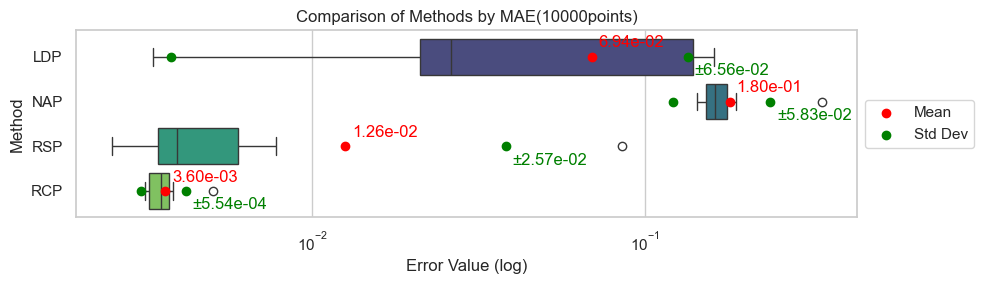

In [25]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


df = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(10, 3))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(10000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='center left', bbox_to_anchor=(1, 0.5))  # 图例放在右侧中部


# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

# 保存为 PNG 文件
fig.savefig('MAE.png', dpi=300, bbox_inches='tight')  # 保存高分辨率图像

C:\Users\lcy\AppData\Local\Temp\ipykernel_100016\2260409687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


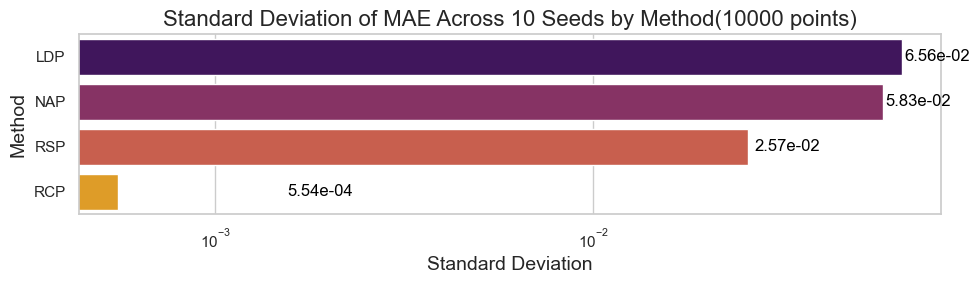

In [26]:
# 计算每种方法在10个seed下的标准差
std_df = df.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(10, 3))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')  # 使用对数刻度

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(10000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()

# 保存为 PNG 文件
plt.savefig('MAEstd.png', dpi=300, bbox_inches='tight')  # 保存当前绘图
# 显示图像
plt.show()



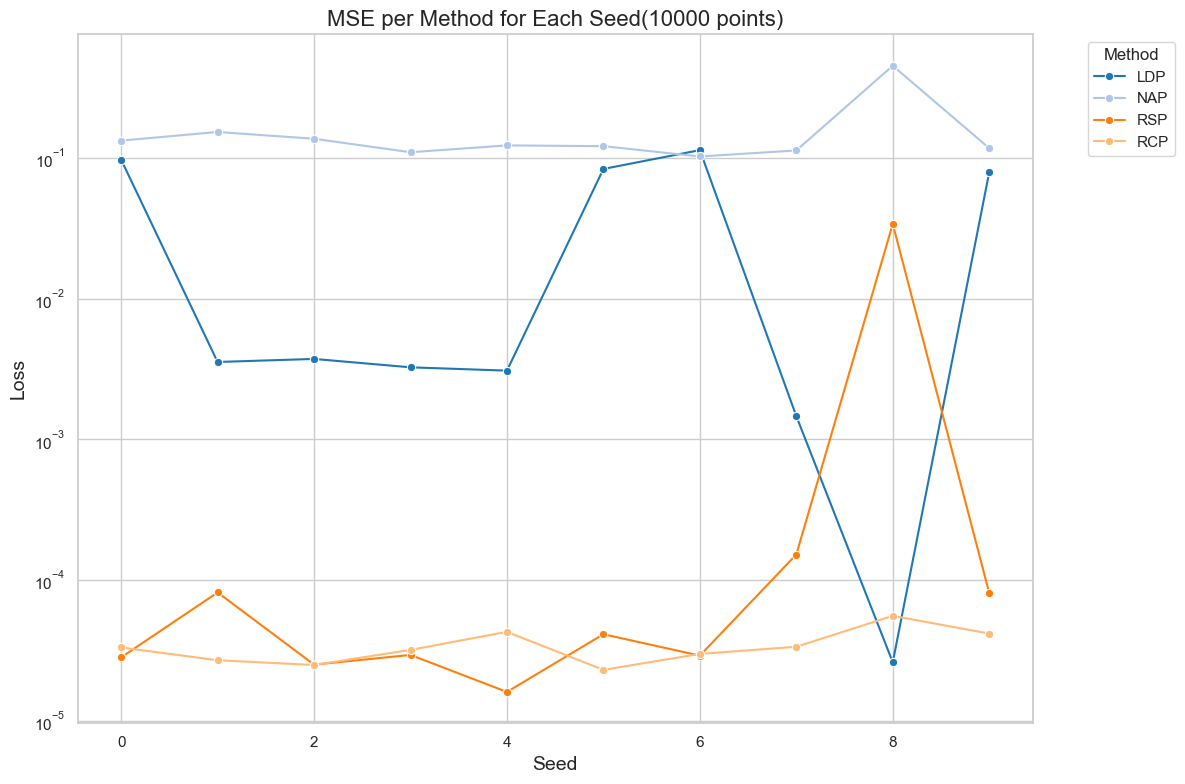

In [27]:
# 示例数据
methods = ['LDP', 'NAP', 'RSP', 'RCP']
seeds = range(10)
loss_values = {
    'LDP': [0.09705432957736754, 0.003543096871902167, 0.003724523925688905, 0.0032468308516055305, 0.0030754373299206527, 0.08341862201447513, 0.11356128234609232, 0.0014617089403809935, 2.599706992089799e-05, 0.07895523225411608],
    'NAP': [0.13267003005555436, 0.15275546139447982, 0.13676684486426535, 0.10966868326690424, 0.12263746970453065, 0.12114027388683257, 0.10231270286754783, 0.11292662911214085, 0.451717026135263, 0.11721403509028032],
    'RSP': [2.8194297321216202e-05, 8.155370986848867e-05, 2.503566829577554e-05, 2.9325829357864324e-05, 1.6007193653318896e-05, 4.11555245277044e-05, 2.8996736546743608e-05, 0.00015170804315523106, 0.033930164422811174, 8.091771702879989e-05],
    'RCP': [3.3134912457319505e-05, 2.6893981369705472e-05, 2.4880212248937795e-05, 3.18541655818488e-05, 4.280328337169012e-05, 2.2965786421520835e-05, 2.9816968355408335e-05, 3.3533787270400454e-05, 5.559322608919364e-05, 4.162712043674625e-05],
}

# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

df = pd.DataFrame(data)

# 确保方法按指定顺序排序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

plt.yscale('log')  # 使用对数坐标

# 3. 设置图形标题和标签
plt.title('MSE per Method for Each Seed(10000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_100016\1467925074.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)


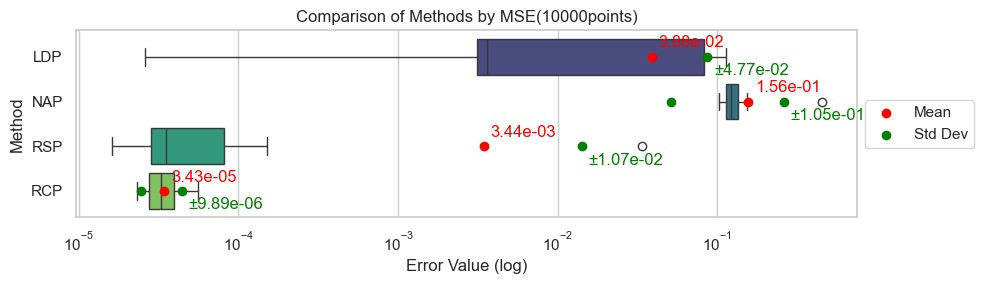

In [28]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


df = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(10, 3))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(10000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='center left', bbox_to_anchor=(1, 0.5))  # 图例放在右侧中部


# 调整图像布局
plt.tight_layout()

# 保存为 PNG 文件
plt.savefig('MSE.png', dpi=300, bbox_inches='tight')  # 保存当前绘图
# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_13088\4159249389.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = df.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_13088\4159249389.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


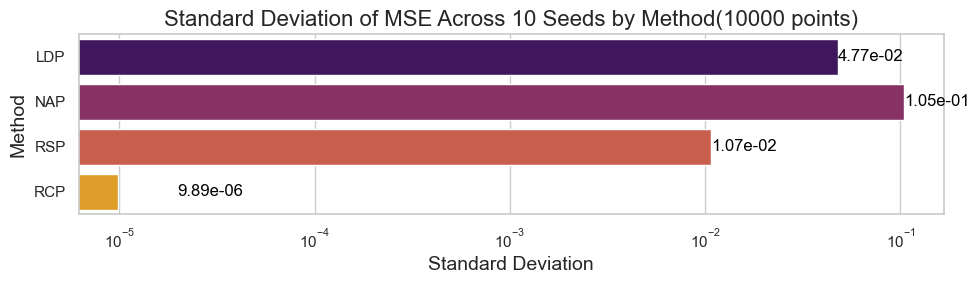

In [14]:
# 计算每种方法在10个seed下的标准差
std_df = df.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(10, 3))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')  # 使用对数刻度

# 添加标题和轴标签
plt.title('Standard Deviation of MSE Across 10 Seeds by Method(10000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.00001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()

# 保存为 PNG 文件
plt.savefig('MSEstd.png', dpi=300, bbox_inches='tight')  # 保存当前绘图
# 显示图像
plt.show()